In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('tab10') # rainbow, colorblind, 

In [2]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Clean dữ liệu bằng fillna

In [4]:
# Tính số lượng dữ liệu bị thiếu tại mỗi cột
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown') # Dữ liệu deck là phân loại Categorical
titanic['deck'] = titanic['deck'].fillna('Unknown')

In [7]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x))

who    sibsp  parch
child  0      0        0.000000
              1        0.000000
              2        0.000000
       1      0        0.000000
              1        0.000000
              2        0.000000
       2      1        0.000000
              2        0.000000
       3      1        0.000000
              2        0.000000
       4      1        0.000000
              2        0.000000
       5      2        0.000000
man    0      0        0.260976
              1        0.000000
              2        0.000000
       1      0        0.118644
              1        0.095238
              2        0.200000
              3        0.000000
              4        0.000000
              5        0.000000
       2      0        0.153846
              1        0.000000
       3      1        1.000000
              2        0.000000
       4      1        0.000000
       8      2        1.000000
woman  0      0        0.214876
              1        0.055556
              2     

In [8]:
ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean())) # điền các giá trị bị thiếu bằng giá trị trung bình của nhóm
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [9]:
titanic['age'] = ser

In [10]:
titanic['age'].isnull().sum()

11

In [11]:
ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [12]:
titanic['age'] = ser

In [13]:
titanic['age'].isnull().sum()

7

In [14]:
child_age = titanic[titanic['who'] == 'child']['age'].mean()
child_age

6.369518072289156

In [15]:
titanic['age'] = titanic['age'].fillna(child_age)

In [16]:
# Xây dựng biến phái sinh (Feature extraction)

In [30]:
# Xử lý dữ liệu dạng sô

<AxesSubplot:xlabel='age', ylabel='Count'>

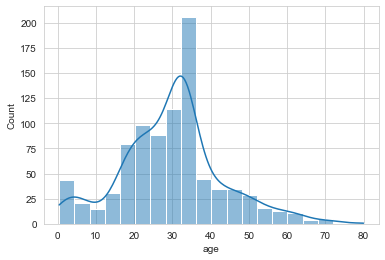

In [18]:
sns.histplot(data=titanic, x='age', bins=20, kde=True)

In [20]:
age_groups = [0, 15, 25, 45, 60, 70, 100] # 0 và 100 là lowerbound và upper bound
# 0 --> 15 --> 25
titanic['age_group'] = pd.cut(titanic['age'], bins=age_groups)
titanic['age_group']

0      (15, 25]
1      (25, 45]
2      (25, 45]
3      (25, 45]
4      (25, 45]
         ...   
886    (25, 45]
887    (15, 25]
888    (25, 45]
889    (25, 45]
890    (25, 45]
Name: age_group, Length: 891, dtype: category
Categories (6, interval[int64, right]): [(0, 15] < (15, 25] < (25, 45] < (45, 60] < (60, 70] < (70, 100]]

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

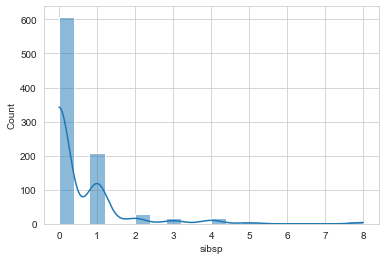

In [21]:
sns.histplot(data=titanic, x='sibsp', bins=20, kde=True)

<AxesSubplot:xlabel='parch', ylabel='Count'>

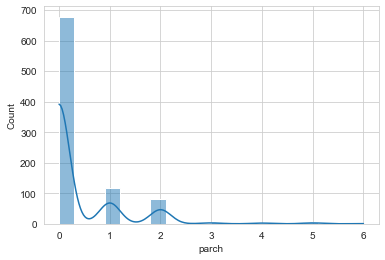

In [22]:
sns.histplot(data=titanic, x='parch', bins=20, kde=True)

In [23]:
np.log1p(titanic['sibsp']) # log1p(x) -> ln(1 + x) # Trừ trường hợp hợp x=0 

0      0.693147
1      0.693147
2      0.000000
3      0.693147
4      0.000000
         ...   
886    0.000000
887    0.000000
888    0.693147
889    0.000000
890    0.000000
Name: sibsp, Length: 891, dtype: float64

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

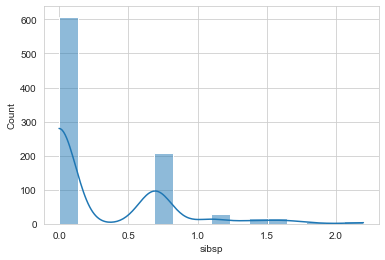

In [26]:
sns.histplot(x=np.log1p(titanic['sibsp']), kde=True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

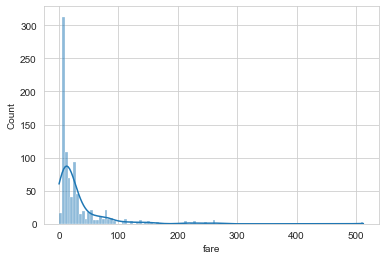

In [27]:
sns.histplot(titanic, x='fare', kde=True)

<AxesSubplot:xlabel='fare', ylabel='Count'>

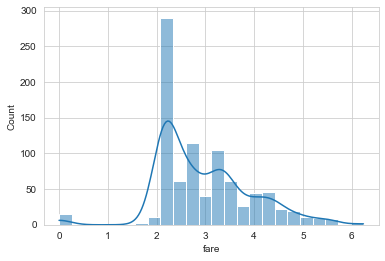

In [28]:
sns.histplot(x=np.log1p(titanic['fare']), kde=True)

In [29]:
titanic['log_fare'] = np.log1p(titanic['fare'])

In [31]:
# Xử lý dữ liệu phân loại và dữ liệu text (nếu có)

In [34]:
# ['sex', 'adult_male', 'alone']
titanic['gender'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['gender']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: gender, Length: 891, dtype: int64

In [37]:
titanic['adult_male'] = titanic['adult_male'].astype(int) # dữ liệu gốc dưới dạng boolean int(boolean) --> True=1, False=0
titanic['adult_male']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

In [38]:
titanic['adult_male'].sum()

537

In [39]:
titanic['alone'] = titanic['alone'].astype(int) # dữ liệu gốc dưới dạng boolean int(boolean) --> True=1, False=0
titanic['alone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone, Length: 891, dtype: int32

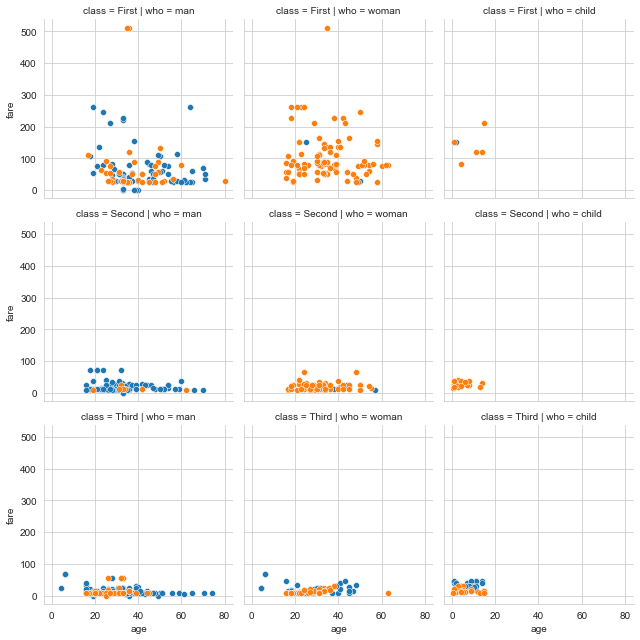

In [44]:
grid = sns.FacetGrid(data=titanic, row='class', col='who', hue='survived')
grid.map(sns.scatterplot, 'age', 'fare')

In [51]:
filter1 = titanic['class'].str.lower().isin(['first', 'second'])
filter2 = titanic['gender'] == 1
titanic['female_class'] = (filter1 & filter2).astype(int)
titanic['female_class']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: female_class, Length: 891, dtype: int32

In [ ]:
# grid = sns.FacetGrid(data=titanic, row='class', col='who', hue='survived')
# grid.map(sns.scatterplot, 'age', 'fare')

In [52]:
titanic.to_csv('preprocessed_titanic.csv')

In [53]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,log_fare,gender,female_class
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,1,Unknown,Southampton,no,0,"(15, 25]",2.110213,0,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0,"(25, 45]",4.280593,1,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,0,Unknown,Southampton,yes,1,"(25, 45]",2.188856,1,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0,"(25, 45]",3.990834,1,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,1,Unknown,Southampton,no,1,"(25, 45]",2.202765,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,1,Unknown,Southampton,no,1,"(25, 45]",2.639057,0,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1,"(15, 25]",3.433987,1,1
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,0,Unknown,Southampton,no,0,"(25, 45]",3.196630,1,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1,"(25, 45]",3.433987,0,0


In [62]:
# One-hot-encoding
# [Unknown, C, B] --> 
# Unknown: [1 0 0]
# C:       [0 1 0]
# B:       [0 0 1]
encoded = pd.get_dummies(titanic[['deck', 'embarked', 'who', 'class', 'age_group']])
encoded

,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embarked_C,embarked_Q,...,who_woman,class_First,class_Second,class_Third,"age_group_(0, 15]","age_group_(15, 25]","age_group_(25, 45]","age_group_(45, 60]","age_group_(60, 70]","age_group_(70, 100]"
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
887,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
888,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
889,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [63]:
titanic.join(encoded)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,who_woman,class_First,class_Second,class_Third,"age_group_(0, 15]","age_group_(15, 25]","age_group_(25, 45]","age_group_(45, 60]","age_group_(60, 70]","age_group_(70, 100]"
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,0,0,0,1,0,1,0,0,0,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,1,1,0,0,0,0,1,0,0,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,1,1,0,0,0,0,1,0,0,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,...,0,0,1,0,0,0,1,0,0,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,...,1,1,0,0,0,1,0,0,0,0
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,...,1,0,0,1,0,0,1,0,0,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,...,0,1,0,0,0,0,1,0,0,0


In [64]:
titanic.to_csv('preprocess2_titanic.csv')